# Getting data from NOAA webpage

In [ ]:
!wget -o land_global_temperature_anomaly-1880-2015.csv https://

In [1]:
import numpy 

In [2]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [4]:
T_land=numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv', delimiter=',', skiprows=4)

In [6]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [7]:
numpy.shape(T_land)

(1632, 2)

In [9]:
1632/12

136.0

In [13]:
from matplotlib import pyplot
%matplotlib inline

In [14]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [17]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

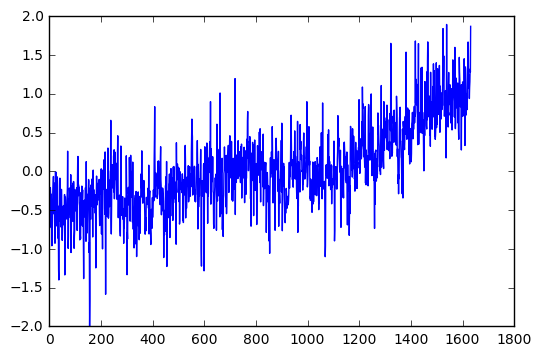

In [18]:
pyplot.plot(T_land[:,1])

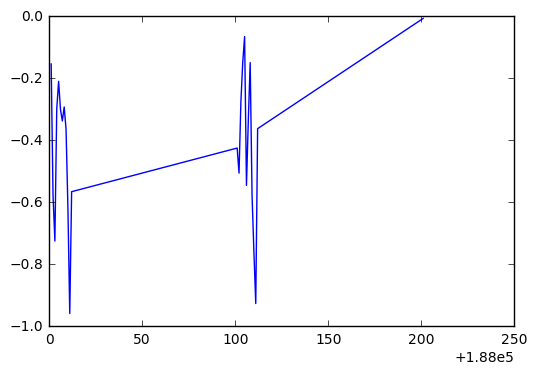

In [21]:
#remember that to remove the ugly line at the beggining of the plot
#we use a ; at the end of the comand
pyplot.plot(T_land[:25,0],T_land[:25,1]);

# Using numpy.arange() for creating our date

In [28]:
date = numpy.arange('1880', '2016', dtype=('datetime64[M]'))

In [29]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [30]:
len(date)

1632

In [31]:
dummy = numpy.linspace(1,1632, 1632)

In [32]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


In [33]:
len(dummy)

1632

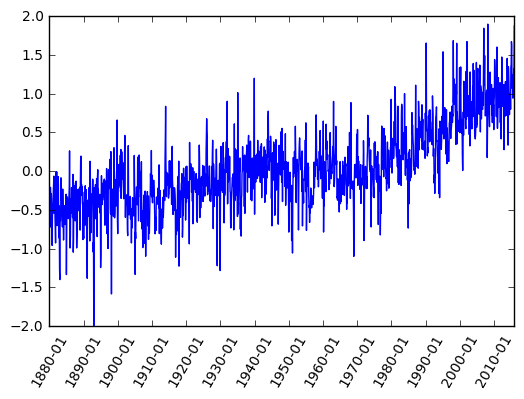

In [38]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=60)
pyplot.plot(dummy, T_land[:, 1]);

In [40]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

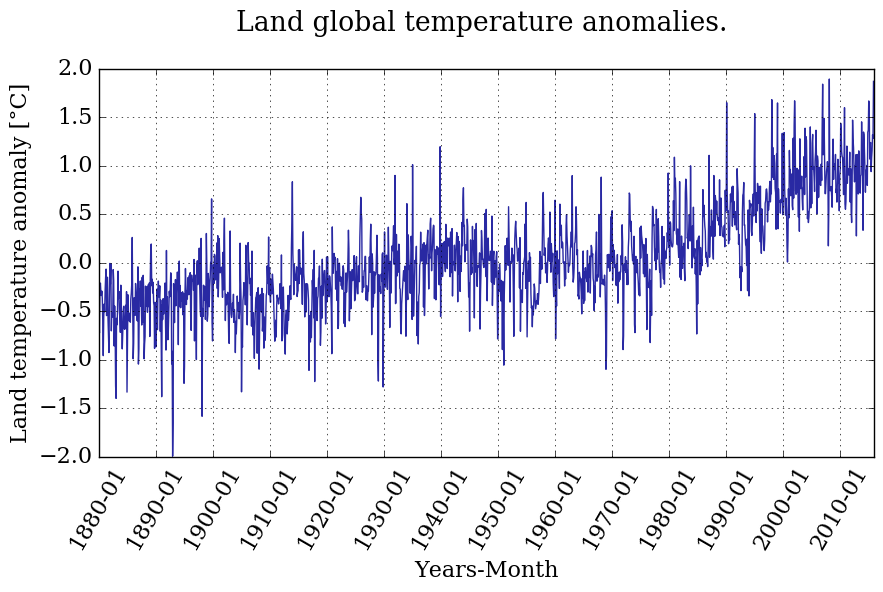

In [49]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=60)
pyplot.plot(dummy, T_land[:, 1], color='#2929a3', ls='-', lw=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Years-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();
#pyplot.savefig('temp_anomalies.pdf');

# Histograms

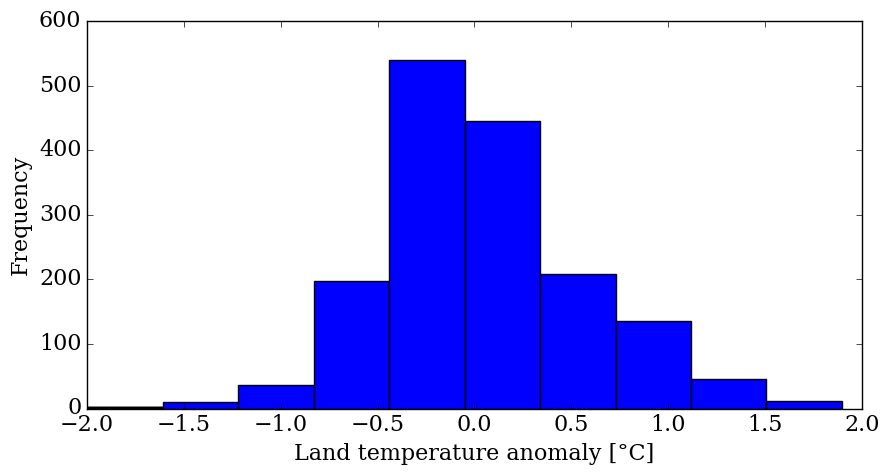

In [50]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

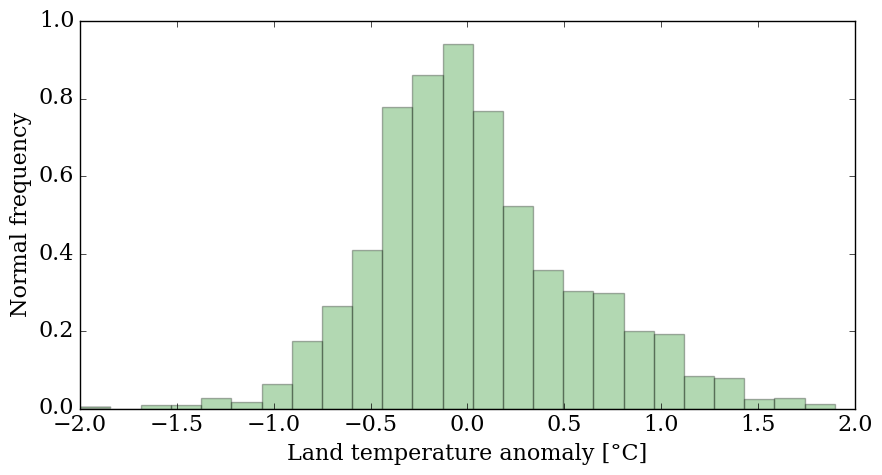

In [56]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=25, normed=True, color='g', alpha=0.3)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normal frequency')

# Let's do some stats

In [61]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean valua is {:.7} and the median is {:.5}'.format(mean_T, median_T))

The mean valua is 0.04030993 and the median is -0.0276


In [62]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)

print('The variance is {:.7} and the standard deviation is {:.5}'.format(variance_T, sigma_T))

The variance is 0.2804142 and the standard deviation is 0.52954


In [63]:
from scipy import stats

NameError: name 'stat' is not defined

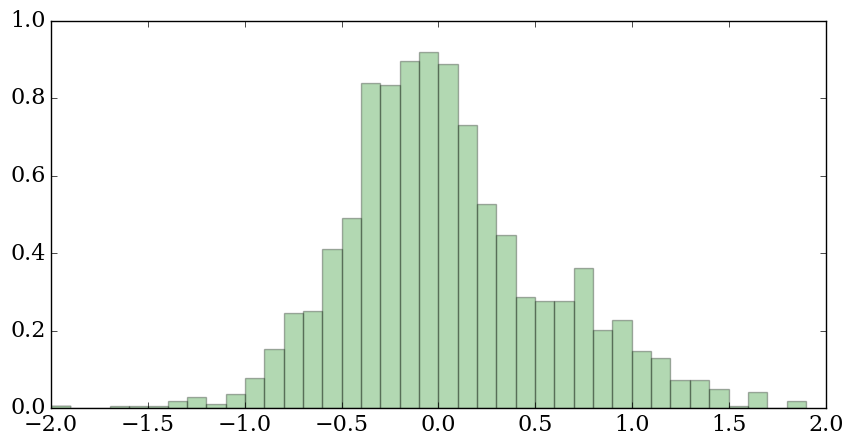

In [69]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(10,5))

pyplot.hist(T_land[:,1], bins, normed=True, color='g', alpha=0.3)
pyplot.hist(bins, stat.norm.pdf(bins, mean_T, sigma_T), color='g', ls='-', lw=2.5)

pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normal frequency')
pyplot.grid();